# Funcion de distribucion de probabilidad 
* PDF= probability density function
* CDF = cumulative density function

### Distribucion uniforme
Entre A y B hay la misma probabilidad de que salga el valor elegido. La probabilidad se distribuye uniformemente entre ambos puntos (Ejemplo random entre 0 y 1)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
np.random.seed(2018)

In [6]:
desde = 1
hasta = 100
muestras = 100000
data = np.random.uniform(desde, hasta, muestras)
data

array([88.35258186, 11.32844605, 90.79392402, ..., 34.25937858,
       62.26575582, 19.9828539 ])

(-10, 110)

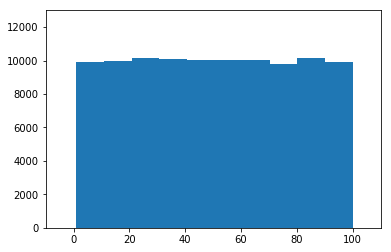

In [7]:
%matplotlib inline
plt.hist(data)
plt.ylim(0,13000)
plt.xlim(-10,110)

### Standard Normal Distribution (Bell Curve)
Distribucion Normal
* Campana Gaussiana
* La mayoria de los ejemplos tienden a adecuarse a una curva normal a medida que mas casos hay
* La base del DS es que a la larga todos los datos terminan acomodandose a una curva gaussiana (identificar esos valores es lo que permite extraer el valor en el dato)
* Los valores centrales son la Media y la STD (desviacion estandar)

In [8]:
data2 = np.random.randn(1000)

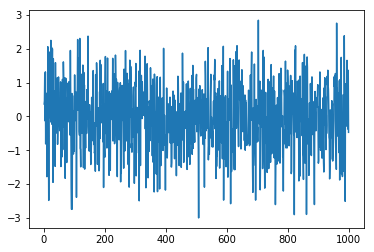

In [9]:
x = range(1,1001)
plt.plot(x, data2)

(array([ 14.,  34.,  98., 207., 263., 212., 120.,  45.,   7.]),
 array([-2.99835986, -2.3495706 , -1.70078133, -1.05199207, -0.40320281,
         0.24558645,  0.89437571,  1.54316498,  2.19195424,  2.8407435 ]),
 <a list of 9 Patch objects>)

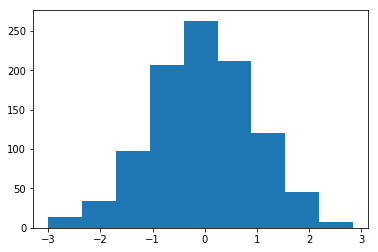

In [10]:
plt.hist(data2, bins=9)

Funcion de distribucion acumulada 

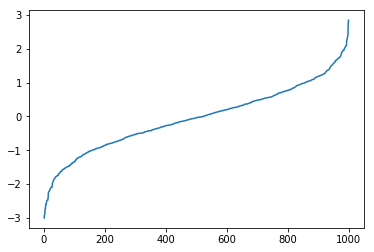

In [11]:
# Ordena los valores para mostrar la funcion de distribucion acumulada
plt.plot(x, sorted(data2))


(array([  47.,  208.,  757., 1829., 2585., 2412., 1402.,  574.,  166.,
          20.]),
 array([-2.7436324 , -1.04559514,  0.65244213,  2.35047939,  4.04851666,
         5.74655392,  7.44459118,  9.14262845, 10.84066571, 12.53870298,
        14.23674024]),
 <a list of 10 Patch objects>)

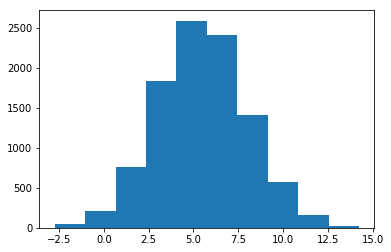

In [12]:
# Si queremos que la distribucion no gire en torno a 0 y la desviacion tipica sea de 2.5
mu = 5.5
sd = 2.5
z = np.random.randn(10000)
data3 = mu +  sd * z
# Z = (X - mu) / sd  -->  N(0,1), X = mu + sd * Z

plt.hist(data3)


# Metodo de simulacion de Monte Carlo
* Recrea el experimento para simular el calculo del valor exacto de py


* Generamos dos numeros aleatorios entre x e y
* Calculamos x*x + y*y
    * si el valor es inferior a 1 estamos dentro del circulo 
    * si el valor es superior a 1 estamos fuera del circulo
* Calculamos el numero total de veces que estan dentro del circulo y lo dividimos entre el numero total de intentos para obtener una aproximacion de la probabilidad de caer dentro del circulo.
* Usamos dicha probabilidad para aproximar el valor de pi.
* Repetimos el experimento un numero suficiente de veces para obtener diferentes aproximaciones de pi

In [17]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j]*x[j]+y[j]*y[j])
            if z<1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp
    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.1418436000000014


(3.1418436000000014, [<matplotlib.lines.Line2D at 0xa284a90>])

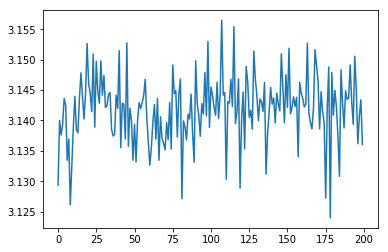

In [19]:
pi_montecarlo(100000,200)

## Dummy data sets

In [87]:
def dummy_ds(n):
    data4 = pd.DataFrame({
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5 * np.random.randn(n),
        'C' : np.random.uniform(5,32, n)
    }
    )
    return data4

In [88]:
dummy_ds(10)

,A,B,C
0,-0.206311,-1.010621,5.102394
1,-0.370418,3.543795,14.932382
2,-1.537971,1.000733,10.054331
3,0.224174,3.073991,12.585923
4,0.774920,0.785243,12.466740
5,0.293627,3.453985,10.915822
6,0.883605,2.547527,12.152061
7,0.586290,5.287771,26.731019
8,-0.290178,-4.499981,12.180915
9,-1.814179,2.841632,5.323384


In [89]:
data = dummy_ds(10000)

(array([   4.,   41.,  285., 1114., 2516., 3043., 2085.,  733.,  162.,
          17.]),
 array([-4.22416068, -3.43258659, -2.64101251, -1.84943843, -1.05786434,
        -0.26629026,  0.52528382,  1.31685791,  2.10843199,  2.90000607,
         3.69158016]),
 <a list of 10 Patch objects>)

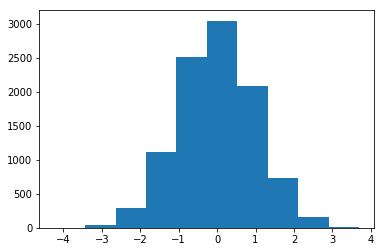

In [90]:
plt.hist(data["A"])

(array([   5.,   75.,  422., 1387., 2624., 2947., 1772.,  636.,  114.,
          18.]),
 array([-8.45616133, -6.52493314, -4.59370495, -2.66247677, -0.73124858,
         1.1999796 ,  3.13120779,  5.06243598,  6.99366416,  8.92489235,
        10.85612054]),
 <a list of 10 Patch objects>)

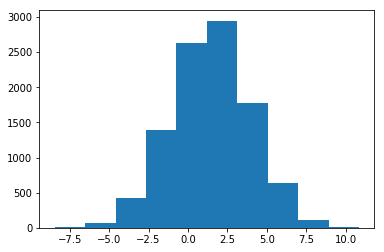

In [91]:
plt.hist(data["B"])

(array([1000., 1074.,  984., 1061., 1004.,  982.,  977.,  996.,  969.,
         953.]),
 array([ 5.00201786,  7.70117828, 10.40033869, 13.0994991 , 15.79865952,
        18.49781993, 21.19698035, 23.89614076, 26.59530118, 29.29446159,
        31.993622  ]),
 <a list of 10 Patch objects>)

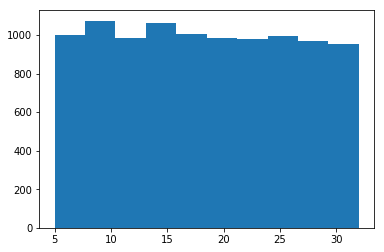

In [92]:
plt.hist(data["C"])

In [93]:
data = pd.read_csv("../python-ml-course-master/datasets/customer-churn-model/Customer Churn Model.txt")

In [94]:
data

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [98]:
column_names = data.columns.values.tolist()

In [99]:
a = len(column_names)
a

21

In [104]:
new_data  = pd.DataFrame(
{
    "Column Name": column_names,
    "A": np.random.randn(a),
    "B": np.random.uniform(0,1,a)
}, index = range(42,42 +a)) # poniendo el index a partir de 42 puede empalmarse dos data sets sin pisar los numeros

In [105]:
new_data

,Column Name,A,B
42,State,1.417620,0.669412
43,Account Length,0.479781,0.141763
44,Area Code,1.127709,0.165194
45,Phone,0.103129,0.626674
46,Int'l Plan,0.395469,0.718522
47,VMail Plan,0.404083,0.657377
48,VMail Message,-0.650360,0.448274
49,Day Mins,0.421539,0.295630
50,Day Calls,0.475060,0.452584
51,Day Charge,1.388622,0.160435
